In [1]:
#Librerias necesarias
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, StratifiedKFold
from catboost import CatBoostRegressor

In [2]:
#Cargamos el dataset limpio 
data = pd.read_csv('dataclean.csv')
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.sample(3)

,host_is_superhost,host_identity_verified,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,...,Villa Santa Rita,Villa Soldati,Villa Urquiza,Apartment,House,Entire home/apt,Private room,Shared room,bathroomtype_private,bathroomtype_shared
23803,0,0,1,3,1,1,2341,3,1123,1,...,0,0,0,0,1,0,1,0,0,1
41782,0,1,1,1,1,1,2208,1,1125,0,...,0,0,0,0,1,0,1,0,0,1
4142,0,1,4,2,2,2,17370,5,1125,36,...,0,0,0,1,0,1,0,0,1,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47883 entries, 0 to 47882
Data columns (total 75 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_is_superhost       47883 non-null  int64  
 1   host_identity_verified  47883 non-null  int64  
 2   accommodates            47883 non-null  int64  
 3   bathrooms               47883 non-null  int64  
 4   bedrooms                47883 non-null  int64  
 5   beds                    47883 non-null  int64  
 6   price                   47883 non-null  int64  
 7   minimum_nights          47883 non-null  int64  
 8   maximum_nights          47883 non-null  int64  
 9   number_of_reviews       47883 non-null  int64  
 10  review_scores_rating    47883 non-null  float64
 11  air_conditioning        47883 non-null  int64  
 12  pool                    47883 non-null  int64  
 13  parking                 47883 non-null  int64  
 14  tv                      47883 non-null

In [4]:
#Genero mi variable X
X=data.drop(['price'],axis=1)

#Genero la variable y
y = data['price']

#Creamos las muestras
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10,shuffle=True)

### Linear Regression

In [5]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

#Predict
lr_prediction = regressor.predict(X_test)
lr_prediction_train = regressor.predict(X_train)

score = r2_score(y_test, lr_prediction)

print('LR MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, lr_prediction_train), mean_squared_error(y_test, lr_prediction)))
print('LR R^2 train: %.3f, test: %.3f' % (r2_score(y_train, lr_prediction_train),r2_score(y_test, lr_prediction)))
print('-----------------------------------------------------')


LR MSE train: 13496650.655, test: 13736280.428
LR R^2 train: 0.375, test: 0.363
-----------------------------------------------------


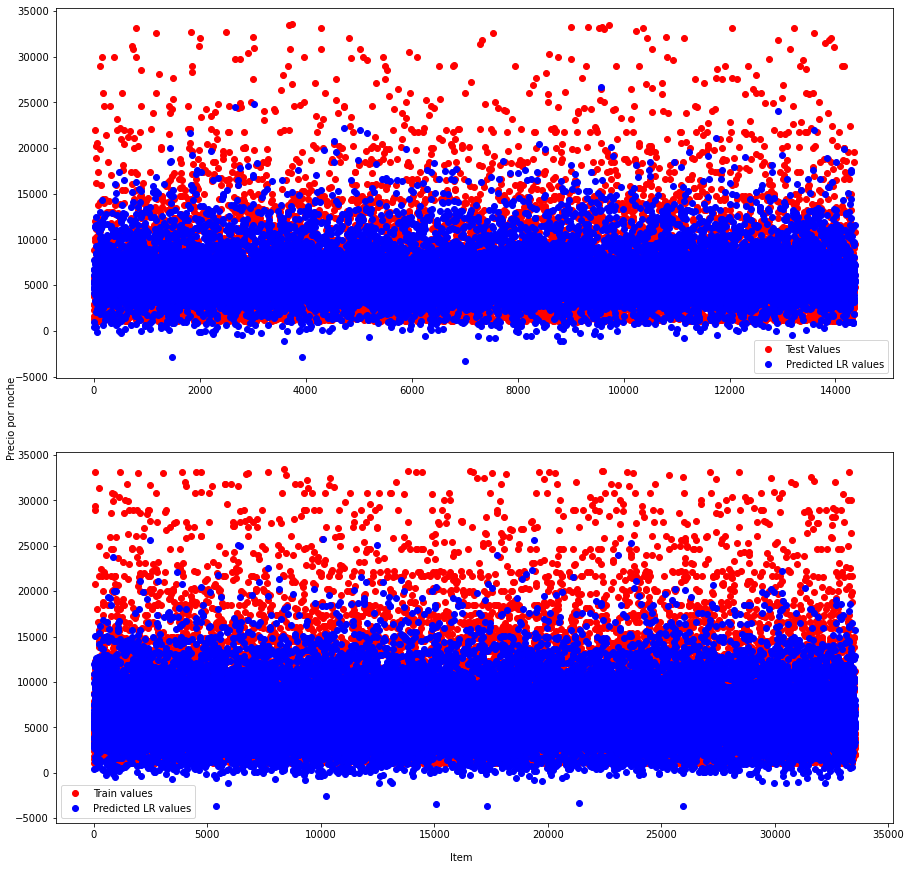

In [6]:
#Gráfico de los valores vs los predecidos
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].plot([i for i in range(len(y_test))],y_test, 'ro', label="Test Values")
axes[0].plot([i for i in range(len(y_test))],lr_prediction, 'bo', label="Predicted LR values")
axes[0].legend()

axes[1].plot([i for i in range(len(y_train))],y_train, 'ro', label="Train values")
axes[1].plot([i for i in range(len(y_train))],lr_prediction_train, 'bo', label="Predicted LR values")
axes[1].legend()

fig.text(0.5, 0.09, 'Item', ha='center')
fig.text(0.08, 0.5, 'Precio por noche', va='center', rotation='vertical')
plt.show()

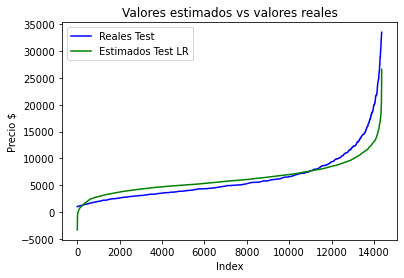

In [7]:
eje_X=range(1,len(y_test)+1)
plt.plot(eje_X, sorted(y_test), color='blue', label='Reales Test')
plt.plot(eje_X, sorted(lr_prediction), color='green', label='Estimados Test LR')
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('Precio $')
plt.show()

In [8]:
scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)
cv = StratifiedKFold(n_splits=5, random_state=41, shuffle=True)

### Random Forest Regression

In [9]:
regressor_rfr = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1,oob_score=True)
regressor_rfr.fit(X_train, y_train.squeeze())

#Model accuracties and validation analysis
#Seattle
y_train_rfr_preds = regressor_rfr.predict(X_train)
y_test_rfr_preds = regressor_rfr.predict(X_test)
print('Random Forest MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_rfr_preds), mean_squared_error(y_test, y_test_rfr_preds)))
print('Random Forest R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_rfr_preds),r2_score(y_test, y_test_rfr_preds)))
print('-----------------------------------------------------')
#print(roc_auc_score(y_train.squeeze(),regressor_rfr.oob_prediction_, multi_class="ovr"))



Random Forest MSE train: 1456256.354, test: 7931226.996
Random Forest R^2 train: 0.933, test: 0.632
-----------------------------------------------------


In [10]:
y_test_rfr_preds

array([ 4543.62661905,  6121.185     ,  2362.57675   , ...,
        6462.96      ,  4593.23      , 10678.09733333])

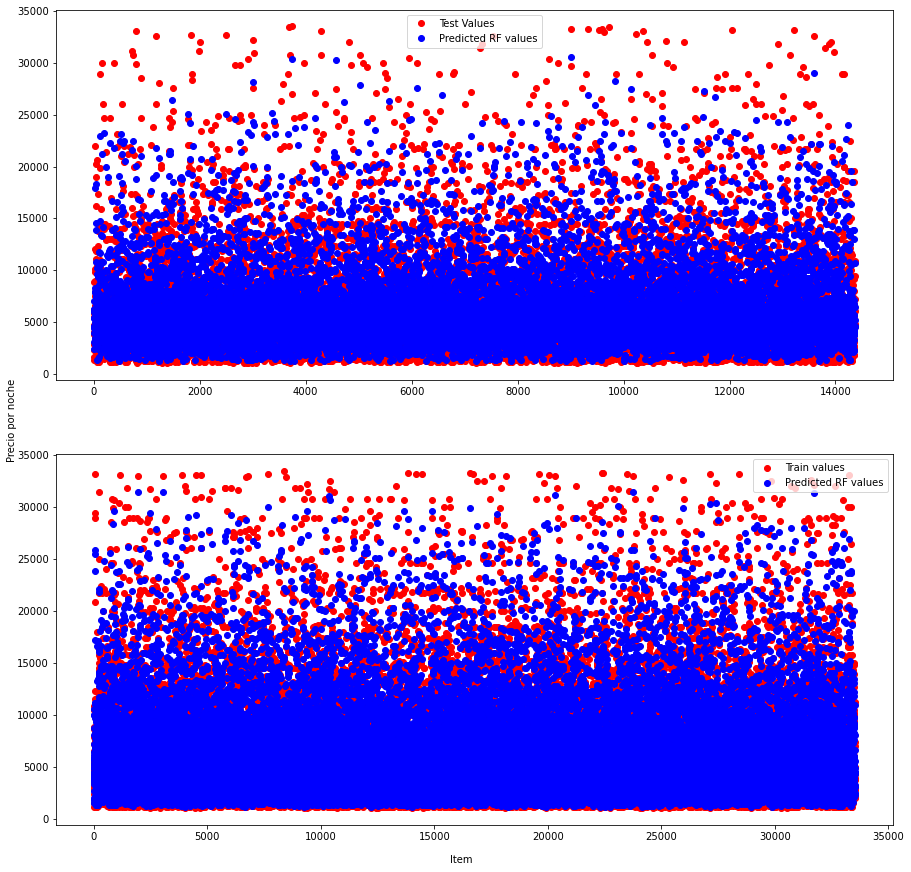

In [11]:
#Gráfico de los valores vs los predecidos
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].plot([i for i in range(len(y_test))],y_test, 'ro', label="Test Values")
axes[0].plot([i for i in range(len(y_test))],y_test_rfr_preds, 'bo', label="Predicted RF values")
axes[0].legend()

axes[1].plot([i for i in range(len(y_train))],y_train, 'ro', label="Train values")
axes[1].plot([i for i in range(len(y_train))],y_train_rfr_preds, 'bo', label="Predicted RF values")
axes[1].legend()

fig.text(0.5, 0.09, 'Item', ha='center')
fig.text(0.08, 0.5, 'Precio por noche', va='center', rotation='vertical')
plt.show()

Text(0.5, 1.0, 'CABA feature importances')

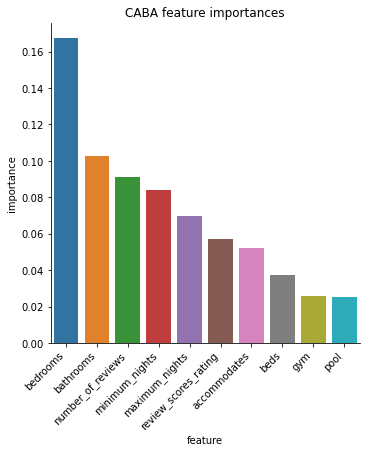

In [12]:
#Feature importancies ranking plot foSeattle's reviews¶
importances = regressor_rfr.feature_importances_
feat_names = X.columns
tree_result = pd.DataFrame({'feature': feat_names, 'importance': importances})
tree_result_sort = tree_result.sort_values(by='importance',ascending=False)[:10]
chart = sns.catplot(x='feature', y='importance', kind='bar', data=tree_result_sort)
chart.set_xticklabels(rotation=45, horizontalalignment='right')
plt.title(label= "CABA feature importances", fontdict=None, loc='center', pad=None)

### XGBoost Regressor

In [13]:
params_xgb = {  
    "n_estimators": [2000], 
    "max_depth": [7,8], 
    "learning_rate": [0.01],  
}

xgb_model = xgb.XGBRegressor()
xgb_grid = GridSearchCV(xgb_model, param_grid=params_xgb, cv=cv, verbose=1, n_jobs=-1)
xgb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


C:\Users\nacho\miniconda3\envs\dsdh22\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  4.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=41, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
          

In [14]:
xgb_grid.best_params_

{'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 2000}

In [15]:
xgb_grid.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=2000, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [16]:
y_pred_test_xg = xgb_grid.best_estimator_.predict(X_test)

mse_xg = np.round(mean_squared_error(y_test, y_pred_test_xg),3)
rmse_xg = np.round(np.sqrt(mse_xg),3)
mae_xg = np.round(mean_absolute_error(y_test, y_pred_test_xg),3)
r2_xg =  r2_score(y_test, y_pred_test_xg)

print('---- TEST ---')
print('MAE   :', mae_xg)
print('MSE   :', mse_xg)
print('RMSE  :', rmse_xg)
print('R^2 = :', r2_xg)


y_pred_train_xg = xgb_grid.best_estimator_.predict(X_train)

mse_xg = np.round(mean_squared_error(y_train, y_pred_train_xg),3)
rmse_xg = np.round(np.sqrt(mse_xg),3)
mae_xg = np.round(mean_absolute_error(y_train, y_pred_train_xg),3)
r2_xg =  r2_score(y_train, y_pred_train_xg)

print('---- TRAIN ---')
print('MAE   :', mae_xg)
print('MSE   :', mse_xg)
print('RMSE  :', rmse_xg)
print('R^2 = :', r2_xg)

C:\Users\nacho\miniconda3\envs\dsdh22\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


---- TEST ---
MAE   : 2026.931
MSE   : 9629520.486
RMSE  : 3103.147
R^2 = : 0.5533084761510412


C:\Users\nacho\miniconda3\envs\dsdh22\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


---- TRAIN ---
MAE   : 1740.925
MSE   : 6867346.275
RMSE  : 2620.562
R^2 = : 0.6819013659438815


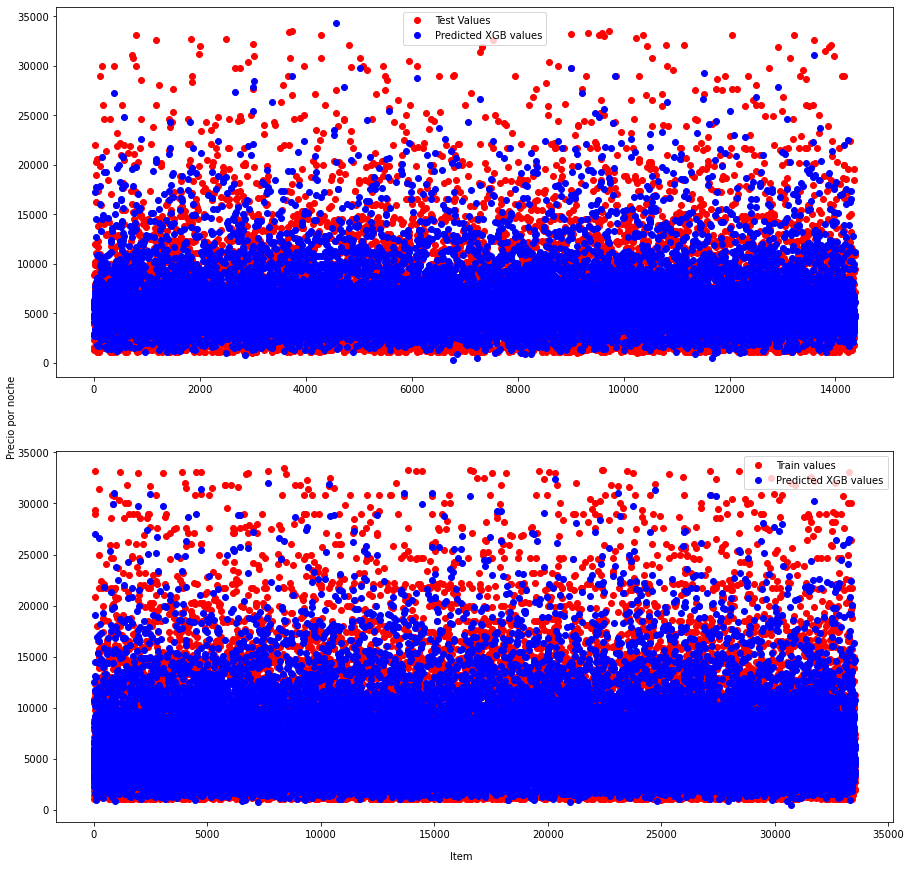

In [17]:
#Gráfico de los valores vs los predecidos
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].plot([i for i in range(len(y_test))],y_test, 'ro', label="Test Values")
axes[0].plot([i for i in range(len(y_test))],y_pred_test_xg, 'bo', label="Predicted XGB values")
axes[0].legend()

axes[1].plot([i for i in range(len(y_train))],y_train, 'ro', label="Train values")
axes[1].plot([i for i in range(len(y_train))],y_pred_train_xg, 'bo', label="Predicted XGB values")
axes[1].legend()

fig.text(0.5, 0.09, 'Item', ha='center')
fig.text(0.08, 0.5, 'Precio por noche', va='center', rotation='vertical')
plt.show()

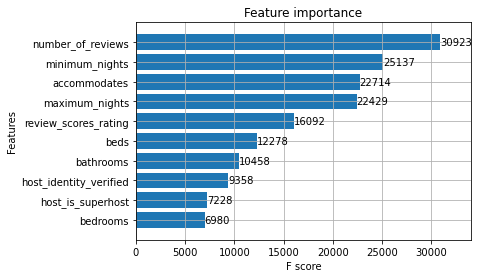

In [18]:
from xgboost import plot_importance
plot_importance(xgb_grid.best_estimator_, height = 0.8,max_num_features=10);

### LGBM

In [19]:

params_lgb = {  
    "n_estimators": [2000,4000], 
    "max_depth": [8], 
    "learning_rate": [0.01],  
}

lgb_model = lgb.LGBMRegressor()
lgb_grid = GridSearchCV(lgb_model, param_grid=params_lgb, cv=cv, verbose=1, n_jobs=-1)
lgb_grid.fit(X_train,y_train)


Fitting 5 folds for each of 2 candidates, totalling 10 fits


C:\Users\nacho\miniconda3\envs\dsdh22\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   30.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=41, shuffle=True),
             estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01], 'max_depth': [8],
                         'n_estimators': [2000, 4000]},
             verbose=1)

In [20]:
lgb_grid.best_params_

{'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 4000}

In [21]:
lgb_grid.best_estimator_

LGBMRegressor(learning_rate=0.01, max_depth=8, n_estimators=4000)

In [22]:
y_pred_test_lgb = lgb_grid.best_estimator_.predict(X_test)

mse_lgb = np.round(mean_squared_error(y_test, y_pred_test_lgb),3)
rmse_lgb = np.round(np.sqrt(mse_lgb),3)
mae_lgb = np.round(mean_absolute_error(y_test, y_pred_test_lgb),3)
r2_lgb =  r2_score(y_test, y_pred_test_lgb)

print('---- TEST ---')
print('MAE   :', mae_lgb)
print('MSE   :', mse_lgb)
print('RMSE  :', rmse_lgb)
print('R^2 = :', r2_lgb)


y_pred_train_lgb = lgb_grid.best_estimator_.predict(X_train)

mse_lgb = np.round(mean_squared_error(y_train, y_pred_train_lgb),3)
rmse_lgb = np.round(np.sqrt(mse_lgb),3)
mae_lgb = np.round(mean_absolute_error(y_train, y_pred_train_lgb),3)
r2_lgb =  r2_score(y_train, y_pred_train_lgb)

print('---- TRAIN ---')
print('MAE   :', mae_lgb)
print('MSE   :', mse_lgb)
print('RMSE  :', rmse_lgb)
print('R^2 = :', r2_lgb)

---- TEST ---
MAE   : 2114.993
MSE   : 10416308.168
RMSE  : 3227.431
R^2 = : 0.5168111874967831
---- TRAIN ---
MAE   : 1900.234
MSE   : 8289102.137
RMSE  : 2879.08
R^2 = : 0.6160449813096112


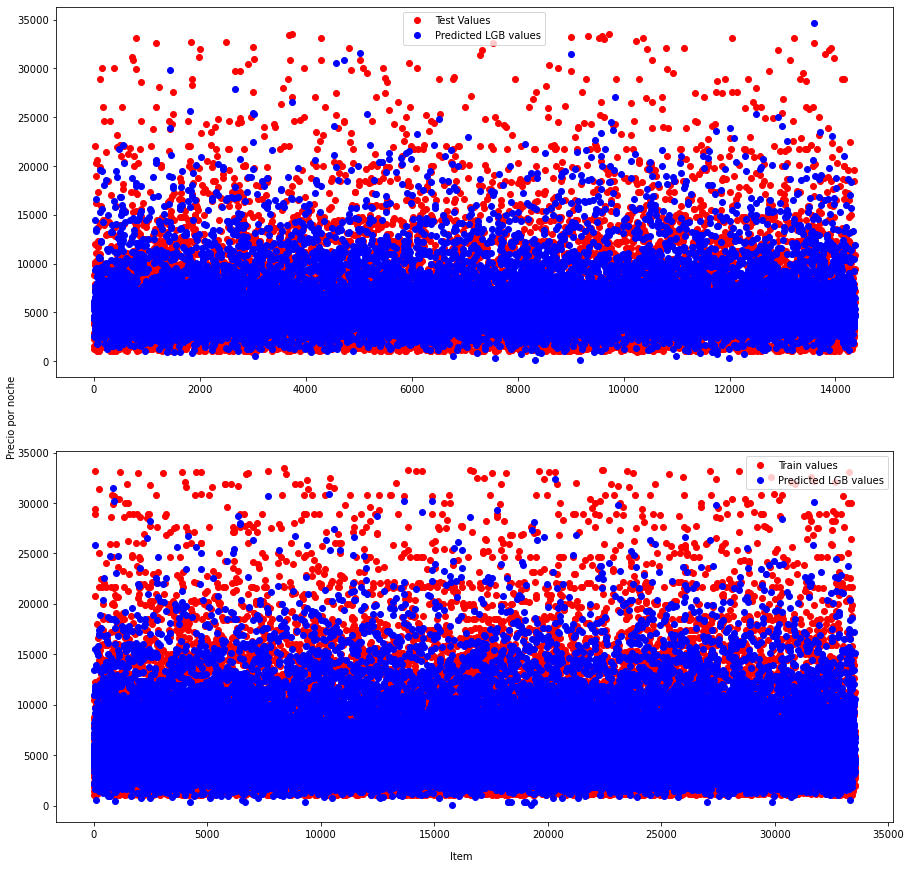

In [23]:
#Gráfico de los valores vs los predecidos
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].plot([i for i in range(len(y_test))],y_test, 'ro', label="Test Values")
axes[0].plot([i for i in range(len(y_test))],y_pred_test_lgb, 'bo', label="Predicted LGB values")
axes[0].legend()

axes[1].plot([i for i in range(len(y_train))],y_train, 'ro', label="Train values")
axes[1].plot([i for i in range(len(y_train))],y_pred_train_lgb, 'bo', label="Predicted LGB values")
axes[1].legend()

fig.text(0.5, 0.09, 'Item', ha='center')
fig.text(0.08, 0.5, 'Precio por noche', va='center', rotation='vertical')
plt.show()

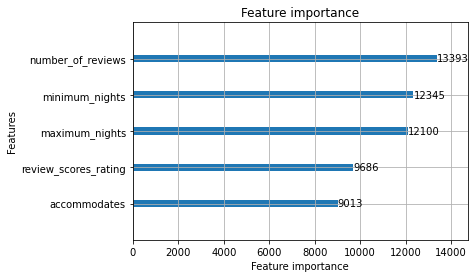

In [24]:
lgb.plot_importance(lgb_grid.best_estimator_, max_num_features=5);

### CatBoost Regressor

In [25]:
parameters_CBR = {'depth'         : [9],
                  'learning_rate' : [0.06],
                  'iterations'    : [1003]
                 }

CBR_model = CatBoostRegressor()
Grid_CBR = GridSearchCV(CBR_model, param_grid = parameters_CBR, cv = cv, verbose = 1, n_jobs=-1)
Grid_CBR.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\nacho\miniconda3\envs\dsdh22\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished


0:	learn: 4546.6501490	total: 154ms	remaining: 2m 34s
1:	learn: 4459.7825654	total: 168ms	remaining: 1m 23s
2:	learn: 4380.7476248	total: 183ms	remaining: 1m
3:	learn: 4304.0621861	total: 195ms	remaining: 48.8s
4:	learn: 4235.6407601	total: 208ms	remaining: 41.6s
5:	learn: 4176.1328911	total: 221ms	remaining: 36.7s
6:	learn: 4121.6385246	total: 233ms	remaining: 33.2s
7:	learn: 4072.8223685	total: 246ms	remaining: 30.6s
8:	learn: 4023.6943142	total: 259ms	remaining: 28.6s
9:	learn: 3983.7799117	total: 271ms	remaining: 26.9s
10:	learn: 3942.6548384	total: 285ms	remaining: 25.7s
11:	learn: 3906.5701245	total: 298ms	remaining: 24.6s
12:	learn: 3873.6507641	total: 309ms	remaining: 23.5s
13:	learn: 3844.6900241	total: 322ms	remaining: 22.7s
14:	learn: 3814.6683750	total: 334ms	remaining: 22s
15:	learn: 3789.3924718	total: 347ms	remaining: 21.4s
16:	learn: 3765.1769365	total: 359ms	remaining: 20.9s
17:	learn: 3741.8129078	total: 373ms	remaining: 20.4s
18:	learn: 3721.9387506	total: 386ms	rema

152:	learn: 3197.0853826	total: 2.55s	remaining: 14.1s
153:	learn: 3196.1583671	total: 2.57s	remaining: 14.2s
154:	learn: 3195.7297810	total: 2.58s	remaining: 14.1s
155:	learn: 3194.4515293	total: 2.6s	remaining: 14.1s
156:	learn: 3193.6654677	total: 2.61s	remaining: 14.1s
157:	learn: 3192.3520935	total: 2.65s	remaining: 14.2s
158:	learn: 3191.2705970	total: 2.66s	remaining: 14.1s
159:	learn: 3190.0385392	total: 2.67s	remaining: 14.1s
160:	learn: 3187.1983977	total: 2.69s	remaining: 14s
161:	learn: 3185.4601570	total: 2.71s	remaining: 14.1s
162:	learn: 3183.1929133	total: 2.72s	remaining: 14s
163:	learn: 3182.0799062	total: 2.74s	remaining: 14s
164:	learn: 3180.9038741	total: 2.75s	remaining: 14s
165:	learn: 3178.9328013	total: 2.77s	remaining: 14s
166:	learn: 3176.8107187	total: 2.78s	remaining: 13.9s
167:	learn: 3174.9368967	total: 2.8s	remaining: 13.9s
168:	learn: 3174.1351385	total: 2.81s	remaining: 13.9s
169:	learn: 3173.1328427	total: 2.84s	remaining: 13.9s
170:	learn: 3172.13546

313:	learn: 3007.0839863	total: 5.21s	remaining: 11.4s
314:	learn: 3006.1101785	total: 5.22s	remaining: 11.4s
315:	learn: 3005.7005160	total: 5.24s	remaining: 11.4s
316:	learn: 3004.5298679	total: 5.25s	remaining: 11.4s
317:	learn: 3001.6676773	total: 5.27s	remaining: 11.3s
318:	learn: 3001.0804313	total: 5.28s	remaining: 11.3s
319:	learn: 3000.4873448	total: 5.32s	remaining: 11.3s
320:	learn: 3000.2936337	total: 5.33s	remaining: 11.3s
321:	learn: 2998.8828089	total: 5.34s	remaining: 11.3s
322:	learn: 2997.5853122	total: 5.36s	remaining: 11.3s
323:	learn: 2995.9976701	total: 5.37s	remaining: 11.3s
324:	learn: 2995.1923136	total: 5.38s	remaining: 11.2s
325:	learn: 2993.4442375	total: 5.39s	remaining: 11.2s
326:	learn: 2992.2175141	total: 5.44s	remaining: 11.3s
327:	learn: 2991.2942667	total: 5.47s	remaining: 11.3s
328:	learn: 2990.8131139	total: 5.49s	remaining: 11.2s
329:	learn: 2989.5024020	total: 5.5s	remaining: 11.2s
330:	learn: 2987.6661579	total: 5.51s	remaining: 11.2s
331:	learn:

463:	learn: 2861.0368228	total: 7.73s	remaining: 8.98s
464:	learn: 2860.4247183	total: 7.75s	remaining: 8.96s
465:	learn: 2859.3601963	total: 7.76s	remaining: 8.95s
466:	learn: 2858.5971737	total: 7.78s	remaining: 8.93s
467:	learn: 2858.0914368	total: 7.8s	remaining: 8.91s
468:	learn: 2857.5308330	total: 7.81s	remaining: 8.89s
469:	learn: 2857.0545079	total: 7.82s	remaining: 8.87s
470:	learn: 2855.9963610	total: 7.83s	remaining: 8.85s
471:	learn: 2855.0340888	total: 7.85s	remaining: 8.83s
472:	learn: 2854.5389036	total: 7.86s	remaining: 8.81s
473:	learn: 2853.7273999	total: 7.87s	remaining: 8.79s
474:	learn: 2851.9527399	total: 7.89s	remaining: 8.77s
475:	learn: 2851.2180125	total: 7.9s	remaining: 8.74s
476:	learn: 2850.7146283	total: 7.91s	remaining: 8.72s
477:	learn: 2850.3022470	total: 7.92s	remaining: 8.7s
478:	learn: 2849.2578570	total: 7.93s	remaining: 8.68s
479:	learn: 2848.6154069	total: 7.98s	remaining: 8.7s
480:	learn: 2847.5961561	total: 8s	remaining: 8.68s
481:	learn: 2847.

620:	learn: 2753.1860206	total: 10.3s	remaining: 6.36s
621:	learn: 2752.5104129	total: 10.4s	remaining: 6.34s
622:	learn: 2751.9929307	total: 10.4s	remaining: 6.33s
623:	learn: 2751.6696495	total: 10.4s	remaining: 6.31s
624:	learn: 2751.5444792	total: 10.4s	remaining: 6.29s
625:	learn: 2751.0974172	total: 10.4s	remaining: 6.27s
626:	learn: 2750.2104233	total: 10.4s	remaining: 6.25s
627:	learn: 2749.1804109	total: 10.4s	remaining: 6.24s
628:	learn: 2748.9586227	total: 10.5s	remaining: 6.22s
629:	learn: 2748.6407935	total: 10.5s	remaining: 6.22s
630:	learn: 2748.4725841	total: 10.5s	remaining: 6.2s
631:	learn: 2747.5644763	total: 10.5s	remaining: 6.18s
632:	learn: 2747.3436640	total: 10.5s	remaining: 6.16s
633:	learn: 2746.8964982	total: 10.5s	remaining: 6.14s
634:	learn: 2746.5871410	total: 10.6s	remaining: 6.12s
635:	learn: 2745.7012569	total: 10.6s	remaining: 6.1s
636:	learn: 2745.0267060	total: 10.6s	remaining: 6.08s
637:	learn: 2744.5782914	total: 10.6s	remaining: 6.07s
638:	learn: 

770:	learn: 2664.3016229	total: 12.7s	remaining: 3.83s
771:	learn: 2663.6691824	total: 12.8s	remaining: 3.82s
772:	learn: 2663.0991209	total: 12.8s	remaining: 3.8s
773:	learn: 2662.7213244	total: 12.8s	remaining: 3.78s
774:	learn: 2661.7121678	total: 12.8s	remaining: 3.77s
775:	learn: 2661.4243493	total: 12.8s	remaining: 3.75s
776:	learn: 2660.9083465	total: 12.8s	remaining: 3.73s
777:	learn: 2660.4806129	total: 12.8s	remaining: 3.71s
778:	learn: 2660.0976394	total: 12.8s	remaining: 3.69s
779:	learn: 2659.6105270	total: 12.9s	remaining: 3.68s
780:	learn: 2659.5212889	total: 12.9s	remaining: 3.66s
781:	learn: 2659.3268942	total: 12.9s	remaining: 3.64s
782:	learn: 2658.8937897	total: 12.9s	remaining: 3.63s
783:	learn: 2658.1982271	total: 12.9s	remaining: 3.61s
784:	learn: 2656.9756863	total: 12.9s	remaining: 3.59s
785:	learn: 2656.5575776	total: 12.9s	remaining: 3.57s
786:	learn: 2656.0830027	total: 13s	remaining: 3.56s
787:	learn: 2655.5839446	total: 13s	remaining: 3.54s
788:	learn: 265

931:	learn: 2580.4995866	total: 15.3s	remaining: 1.17s
932:	learn: 2579.8468138	total: 15.4s	remaining: 1.16s
933:	learn: 2579.3940849	total: 15.4s	remaining: 1.14s
934:	learn: 2579.0411168	total: 15.4s	remaining: 1.12s
935:	learn: 2578.7642182	total: 15.5s	remaining: 1.11s
936:	learn: 2578.3193256	total: 15.5s	remaining: 1.09s
937:	learn: 2578.0152427	total: 15.5s	remaining: 1.07s
938:	learn: 2577.3977804	total: 15.5s	remaining: 1.06s
939:	learn: 2577.0071224	total: 15.5s	remaining: 1.04s
940:	learn: 2576.3780704	total: 15.5s	remaining: 1.02s
941:	learn: 2575.9113848	total: 15.5s	remaining: 1s
942:	learn: 2575.5127891	total: 15.5s	remaining: 989ms
943:	learn: 2574.8882232	total: 15.6s	remaining: 972ms
944:	learn: 2574.7752156	total: 15.6s	remaining: 955ms
945:	learn: 2574.3008603	total: 15.6s	remaining: 939ms
946:	learn: 2573.0824024	total: 15.6s	remaining: 922ms
947:	learn: 2572.7055633	total: 15.6s	remaining: 905ms
948:	learn: 2571.9656539	total: 15.6s	remaining: 889ms
949:	learn: 2

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=41, shuffle=True),
             estimator=<catboost.core.CatBoostRegressor object at 0x00000270CD16FC70>,
             n_jobs=-1,
             param_grid={'depth': [9], 'iterations': [1003],
                         'learning_rate': [0.06]},
             verbose=1)

In [26]:
Grid_CBR.best_params_

{'depth': 9, 'iterations': 1003, 'learning_rate': 0.06}

In [27]:
Grid_CBR.best_estimator_

In [28]:
y_pred_test_cbr = Grid_CBR.best_estimator_.predict(X_test)

mse_cbr = np.round(mean_squared_error(y_test, y_pred_test_cbr),3)
rmse_cbr = np.round(np.sqrt(mse_cbr),3)
mae_cbr = np.round(mean_absolute_error(y_test, y_pred_test_cbr),3)
r2_cbr =  r2_score(y_test, y_pred_test_cbr)

print('---- TEST ---')
print('MAE   :', mae_cbr)
print('MSE   :', mse_cbr)
print('RMSE  :', rmse_cbr)
print('R^2 = :', r2_cbr)


y_pred_train_cbr = Grid_CBR.best_estimator_.predict(X_train)

mse_cbr = np.round(mean_squared_error(y_train, y_pred_train_cbr),3)
rmse_cbr = np.round(np.sqrt(mse_cbr),3)
mae_cbr = np.round(mean_absolute_error(y_train, y_pred_train_cbr),3)
r2_cbr =  r2_score(y_train, y_pred_train_cbr)

print('---- TRAIN ---')
print('MAE   :', mae_cbr)
print('MSE   :', mse_cbr)
print('RMSE  :', rmse_cbr)
print('R^2 = :', r2_cbr)

---- TEST ---
MAE   : 2000.334
MSE   : 9370235.498
RMSE  : 3061.084
R^2 = : 0.5653361162069135
---- TRAIN ---
MAE   : 1699.283
MSE   : 6475780.207
RMSE  : 2544.755
R^2 = : 0.7000388860843973


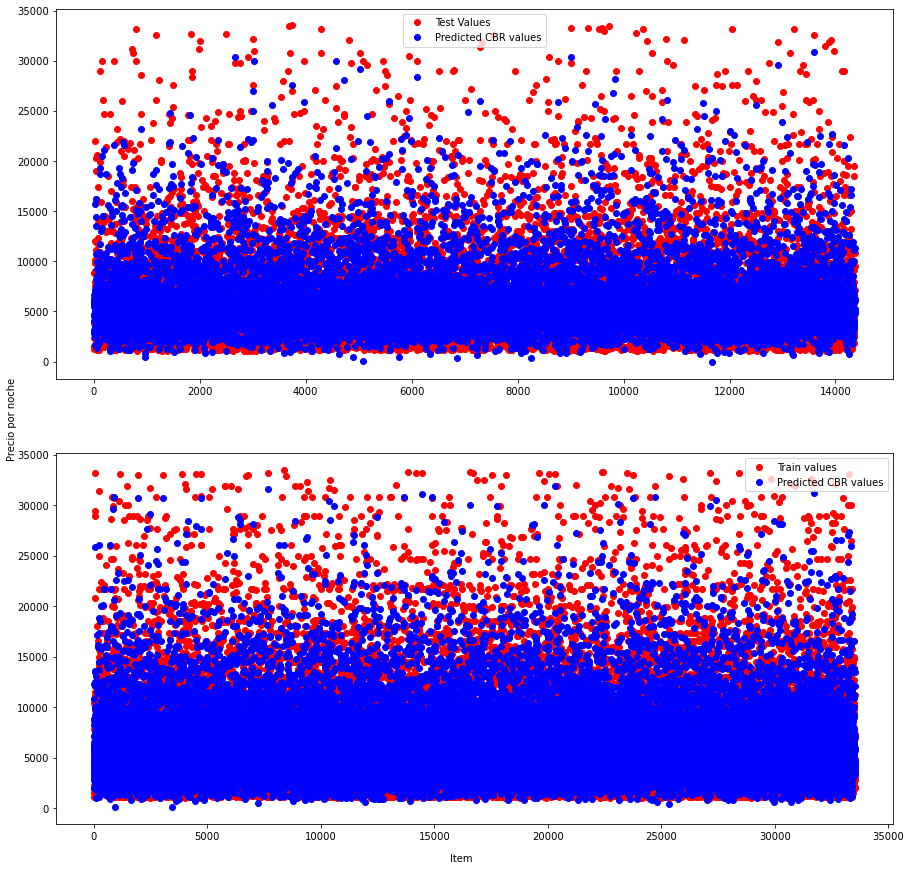

In [29]:
#Gráfico de los valores vs los predecidos
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].plot([i for i in range(len(y_test))],y_test, 'ro', label="Test Values")
axes[0].plot([i for i in range(len(y_test))],y_pred_test_cbr, 'bo', label="Predicted CBR values")
axes[0].legend()

axes[1].plot([i for i in range(len(y_train))],y_train, 'ro', label="Train values")
axes[1].plot([i for i in range(len(y_train))],y_pred_train_cbr, 'bo', label="Predicted CBR values")
axes[1].legend()

fig.text(0.5, 0.09, 'Item', ha='center')
fig.text(0.08, 0.5, 'Precio por noche', va='center', rotation='vertical')
plt.show()

In [30]:
# Guardar modelo

joblib.dump(lgb_grid.best_estimator_,'model.sav')

['model.sav']

In [31]:
joblib.load("model.sav")

LGBMRegressor(learning_rate=0.01, max_depth=8, n_estimators=4000)